# Task 2

In [21]:
import tensorflow as tf
import os
import pathlib
import random
from shutil import move
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow_datasets as tfds

Before running the code below run the to_image.py file using command:

`python to_image.py "mnist-orig" "mnist-image"`

To change the sizes of the images I converted the dataset into images and then rconverted the images into (100, 75, 3)

In [40]:
data_dir = pathlib.Path('mnist-image/training')

In [41]:
img_height = 100
img_width = 75
batch_size = 8

In [53]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  label_mode = "categorical",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  label_mode = "categorical",
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 60000 files belonging to 10 classes.
Using 48000 files for training.
Found 60000 files belonging to 10 classes.
Using 12000 files for validation.


### Load our Pretrained Model.

In [54]:
base_model = keras.models.load_model("main_model")

Exception ignored in: <function tqdm.__del__ at 0x7f73a44faee0>
Traceback (most recent call last):
  File "/home/sanket/anaconda3/envs/tf/lib/python3.8/site-packages/tqdm/std.py", line 1145, in __del__
    self.close()
  File "/home/sanket/anaconda3/envs/tf/lib/python3.8/site-packages/tqdm/notebook.py", line 283, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x7f73a44faee0>
Traceback (most recent call last):
  File "/home/sanket/anaconda3/envs/tf/lib/python3.8/site-packages/tqdm/std.py", line 1145, in __del__
    self.close()
  File "/home/sanket/anaconda3/envs/tf/lib/python3.8/site-packages/tqdm/notebook.py", line 283, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


### Get the summary of our model.

In [70]:
base_model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_zoom_4 (RandomZoom)   (None, 100, 75, 3)        0         
_________________________________________________________________
random_contrast_2 (RandomCon (None, 100, 75, 3)        0         
_________________________________________________________________
random_rotation_2 (RandomRot (None, 100, 75, 3)        0         
_________________________________________________________________
random_zoom_5 (RandomZoom)   (None, 100, 75, 3)        0         
_________________________________________________________________
rescaling_5 (Rescaling)      (None, 100, 75, 3)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 98, 73, 32)        896       
_________________________________________________________________
max_pooling2d_107 (MaxPoolin (None, 49, 36, 32)      

### Load our model and customise it to only predict 10 classes.

In [55]:
for layer in base_model.layers:
    layer.trainable=False
last_layer = base_model.get_layer('max_pooling2d_109')
last_output = last_layer.output
x = layers.Flatten()(last_output)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(10, activation='softmax')(x)

model = Model(base_model.input, x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
history = model.fit(
          train_ds,
          validation_data=val_ds, 
          epochs=15,
        )

Epoch 1/15
6000/6000 [==============================] - 60s 10ms/step - loss: 0.4618 - accuracy: 0.8611 - val_loss: 0.0771 - val_accuracy: 0.9775
Epoch 2/15
6000/6000 [==============================] - 59s 10ms/step - loss: 0.1693 - accuracy: 0.9481 - val_loss: 0.0678 - val_accuracy: 0.9801
Epoch 3/15
6000/6000 [==============================] - 59s 10ms/step - loss: 0.1495 - accuracy: 0.9563 - val_loss: 0.0626 - val_accuracy: 0.9827
Epoch 4/15
6000/6000 [==============================] - 59s 10ms/step - loss: 0.1419 - accuracy: 0.9590 - val_loss: 0.0630 - val_accuracy: 0.9818
Epoch 5/15
6000/6000 [==============================] - 61s 10ms/step - loss: 0.1342 - accuracy: 0.9615 - val_loss: 0.0615 - val_accuracy: 0.9832
Epoch 6/15
6000/6000 [==============================] - 60s 10ms/step - loss: 0.1269 - accuracy: 0.9635 - val_loss: 0.0606 - val_accuracy: 0.9833
Epoch 7/15
6000/6000 [==============================] - 59s 10ms/step - loss: 0.1205 - accuracy: 0.9657 - val_loss: 0.0607 -

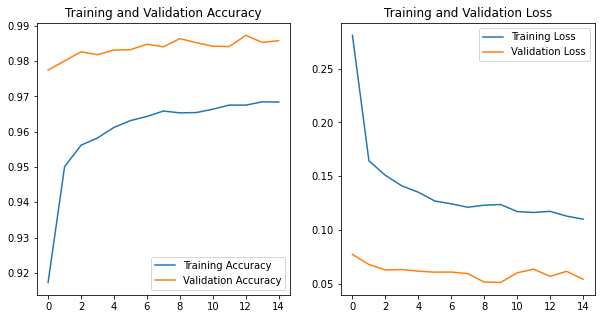

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### We get Training accuracy - 0.9692 and Validation accuracy: 0.9858 on our pretrained model.

In [62]:
data_dir = pathlib.Path('mnist-image/testing')
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10000 files belonging to 10 classes.


In [66]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(img_height, img_width), 
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

history = model2.fit(
      train_generator,
      epochs=15,
      validation_data=validation_generator,
    )

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Epoch 1/15
7500/7500 [==============================] - 168s 22ms/step - loss: 0.2261 - accuracy: 0.9275 - val_loss: 0.0535 - val_accuracy: 0.9839
Epoch 2/15
7500/7500 [==============================] - 169s 23ms/step - loss: 0.0521 - accuracy: 0.9848 - val_loss: 0.0496 - val_accuracy: 0.9868
Epoch 3/15
7500/7500 [==============================] - 163s 22ms/step - loss: 0.0355 - accuracy: 0.9897 - val_loss: 0.0354 - val_accuracy: 0.9898
Epoch 4/15
7500/7500 [==============================] - 163s 22ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0322 - val_accuracy: 0.9901
Epoch 5/15
7500/7500 [==============================] - 163s 22ms/step - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.0563 - val_accuracy: 0.9869
Epoch 6/15
7500/7500 [==============================] - 163s 22ms/step - loss: 0.0209 - accuracy: 0.9937 - val_loss: 0.0420 - val_accuracy: 0.9891
Epoch 7/15
7500/7500 [========

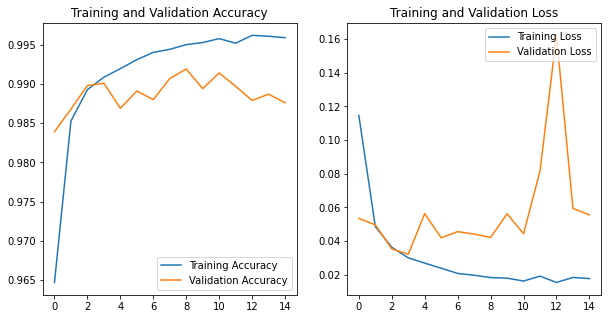

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### We get Training accuracy - 0.9961 and Validation accuracy: 0.9876 if we build our model from scratch.
Let's save this model to label the images in the Task 3.

In [68]:
model2.save("Task_2_Random_Initialization_Model")

INFO:tensorflow:Assets written to: Task_2_Random_Initialization_Model/assets


INFO:tensorflow:Assets written to: Task_2_Random_Initialization_Model/assets
